In [2]:
import numpy as np 
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image

In [3]:
file_path = "test.zip"
output = file_path
if not os.path.exists("Test Set/"):
    gdown.download("https://drive.google.com/uc?id=1W94tVozlrHMY_SWE-45TvWT5PqQjElxc", file_path)
    gdown.extractall(file_path)
    if os.path.exists(file_path):
        os.remove(file_path)

In [4]:
gender_img_height = 378
gender_img_width = 378
emotions_img_height = 224
emotions_img_width = 224
gender_class_names = ["Man", "Woman"]
emotions_class_names = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]

In [5]:
#Load the Model
file_path = "test.zip"
if not os.path.exists("Gender Model/"):
    gdown.download("https://drive.google.com/uc?id=1easVnhBN9o1s60_eAyl8CGj_LHuPoXgc", file_path)
    gdown.extractall(file_path)
    if os.path.exists(file_path):
        os.remove(file_path)
gender_model = keras.models.load_model('Gender Model/')

#Load the Model
file_path = "test.zip"
if not os.path.exists("Emotions Model/"):
    gdown.download("https://drive.google.com/uc?id=1zwwyyd0CZZBDOYt6vSliejyq7NrGbRsT", file_path)
    gdown.extractall(file_path)
    if os.path.exists(file_path):
        os.remove(file_path)
emotions_model = keras.models.load_model('Emotions Model/')

In [6]:
def prepare_img(img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    return images

Woman 'Happy': 0.9999882, 'Neutral': 0.9894482


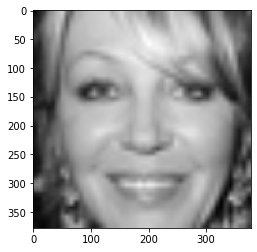

In [12]:
## Load and Predict an image
img = image.load_img("Test Set/333.png", color_mode = "grayscale")

gender_img = cv2.resize(np.float32(img), (gender_img_height, gender_img_width))
gender_classes = gender_model.predict(prepare_img(gender_img))

emotions_img = cv2.resize(np.float32(img), (emotions_img_height, emotions_img_width))
emotions_classes = emotions_model.predict(prepare_img(emotions_img))

index = list(np.where(np.where(emotions_classes > 0.8, 1, 0)[0] == 1)[0])
dictionary = dict()
sorted_dict = dict()
for i in index:
    dictionary[emotions_class_names[i]] = emotions_classes[0][i]
sorted_keys = sorted(dictionary, key=dictionary.get, reverse=True)
for w in sorted_keys:
    sorted_dict[w] = dictionary[w]
    
print(gender_class_names[np.where(gender_classes > 0.5, 1,0)[0][1]] + " " + str(sorted_dict)[1:-1])
plt.imshow(gender_img, cmap="gray")

In [22]:
cap = cv2.VideoCapture(0)

if (cap.isOpened() == False): 
    print("Unable to read camera feed")

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
skip_frames = 30
cur_frames = 0

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

#out = cv2.VideoWriter('outpy.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))
 
while(True):
    ret, frame = cap.read()
    
    if ret == True:
        process_frame = cur_frames % skip_frames == 0
        gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.1, 4)
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 5)
        if process_frame:
            resized = cv2.resize(gray[y:y+h, x:x+w], (emotions_img_height,emotions_img_width))
            emotions_classes = emotions_model.predict(prepare_img(resized))
            dictionary = dict()
            sorted_dict = dict()
            index = list(np.where(np.where(emotions_classes > 0.8, 1, 0)[0] == 1)[0])
            for i in index:
                dictionary[emotions_class_names[i]] = emotions_classes[0][i]
            sorted_keys = sorted(dictionary, key=dictionary.get, reverse=True)
            for w in sorted_keys:
                sorted_dict[w] = dictionary[w]
            print(str(sorted_dict)[1:-1])
            cv2.imshow('frame', frame)
            cur_frames += 1
        else:
            cv2.imshow('frame', frame)
            cur_frames += 1
        #out.write(frame)
        
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            cap.release()
            break
    else:
        break 

cap.release()
#out.release()
 
# Closes all the frames
cv2.destroyAllWindows()

'Neutral': 0.99572104, 'Sad': 0.9868732, 'Fear': 0.9127618
